### 1. Load CATPCHA images and get the transformed (X,y) data

In [1]:
import torch

from helper_functions.data_transformation import get_transformed_data_v1_proportionate, get_transformed_data_for_captcha_evaluation_v1_proportionate

train_folder = "../data/train/combine2"
test_folder = "../data/test/combine2"
cached_data_path = "../data/prepared_data_cnn_v3.4_proportionate.pth"

try:
    # Load the prepared data from cache if it already exists
    X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info = torch.load(cached_data_path)
    print("Loaded prepared data from cache.")

except FileNotFoundError:
    # Else prepare the data and save it
    X_train, y_train = get_transformed_data_v1_proportionate(train_folder, is_train=True)
    X_test, y_test = get_transformed_data_v1_proportionate(test_folder, is_train=False)
    X_test_captcha, y_test_captcha, failed_segmentation_info = get_transformed_data_for_captcha_evaluation_v1_proportionate(test_folder)

    torch.save((X_train, y_train, X_test, y_test, X_test_captcha, y_test_captcha, failed_segmentation_info), cached_data_path)
    print("Saved prepared data to cache.")


Loaded prepared data from cache.


### 2. Instantiate basic CNN model and train it

In [2]:
from models.cnn_for_fun import CNN, CNNParams
from helper_functions.data_transformation import IMG_HEIGHT, IMG_WIDTH


# Instantiate model
cnn_params: CNNParams = {
    "num_classes": 36,
    "input_shape": (1, IMG_HEIGHT, IMG_WIDTH), # (channels, height, width)
    "learning_rate": 1.1*1e-3,
    "num_epochs": 30,
    "batch_size": 250,
}
cnn = CNN(cnn_params)

# Train model
cached_model_path = "../trained_models/cnn_for_fun.pth"
try:
    # Load the trained model from cache if it already exists
    cnn.load_trained_model(cached_model_path)
except FileNotFoundError:
    # Else train the model and save it
    cnn.train_model(X_train, y_train)
    cnn.save_trained_model(cached_model_path)


Training model...


/Users/jh/Documents/Y3S2/CS4243/Mini project/captcha/venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Five worst-performing classes: ['q', 'd', '1', 'o', '0']
Their precision: [0.51923077 0.53676471 0.57377049 0.59090909 0.63101604]
Their recall: [0.81       0.68224299 0.76086957 0.63414634 0.83098592]
Epoch 1, Train Loss: 1.4070, Train Acc: 0.5912, Val Loss: 0.7164, Val Acc: 0.7954
New best model with validation accuracy: 0.7954
Epoch 2, Train Loss: 0.6121, Train Acc: 0.8149, Val Loss: 0.4937, Val Acc: 0.8520
New best model with validation accuracy: 0.8520
Epoch 3, Train Loss: 0.4797, Train Acc: 0.8510, Val Loss: 0.5201, Val Acc: 0.8466
Epoch 4, Train Loss: 0.4042, Train Acc: 0.8745, Val Loss: 0.4114, Val Acc: 0.8758
New best model with validation accuracy: 0.8758
Epoch 5, Train Loss: 0.3419, Train Acc: 0.8931, Val Loss: 0.3689, Val Acc: 0.8877
New best model with validation accuracy: 0.8877
Five worst-performing classes: ['g', 'o', '1', 'a', 'q']
Their precision: [0.64102564 0.65384615 0.75       0.78333333 0.79569892]
Their recall: [0.95238095 0.82926829 0.75       0.8952381  0.74  

### 3. Evaluate CNN model

Character level performance (skipping SF): {
  "accuracy": 0.937,
  "precision": 0.937,
  "recall": 0.935,
  "f1_score": 0.936
}

Captcha level performance: {
  "segmentation_accuracy": 0.934,
  "captcha_accuracy (skipping SF)": 0.731,
  "captcha_accuracy (including SF)": 0.683,
  "character_accuracy (including SF)": 0.876
}

Confusion matrix for individual characters (skipping SF):


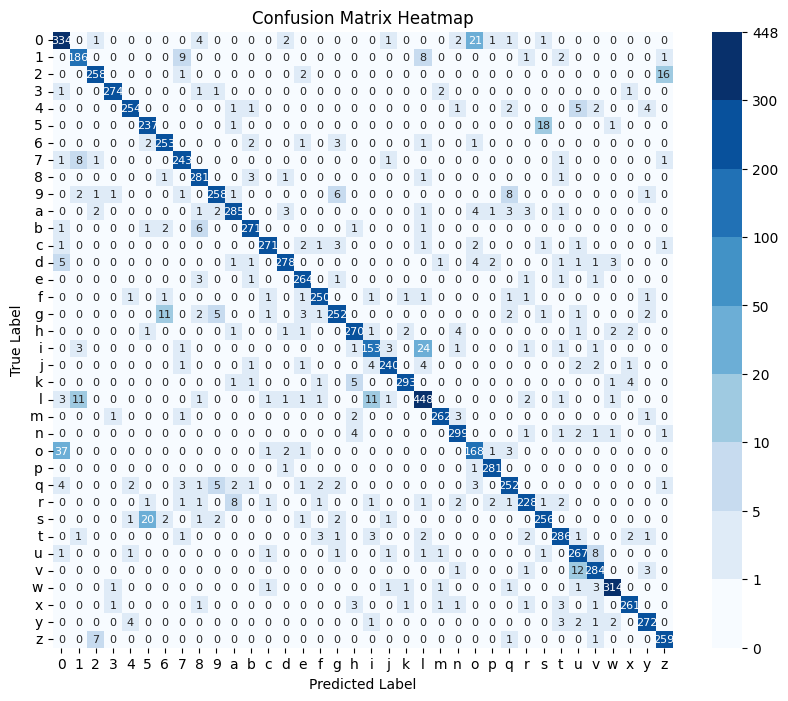

Individual character performance and top confusions (skipping SF):


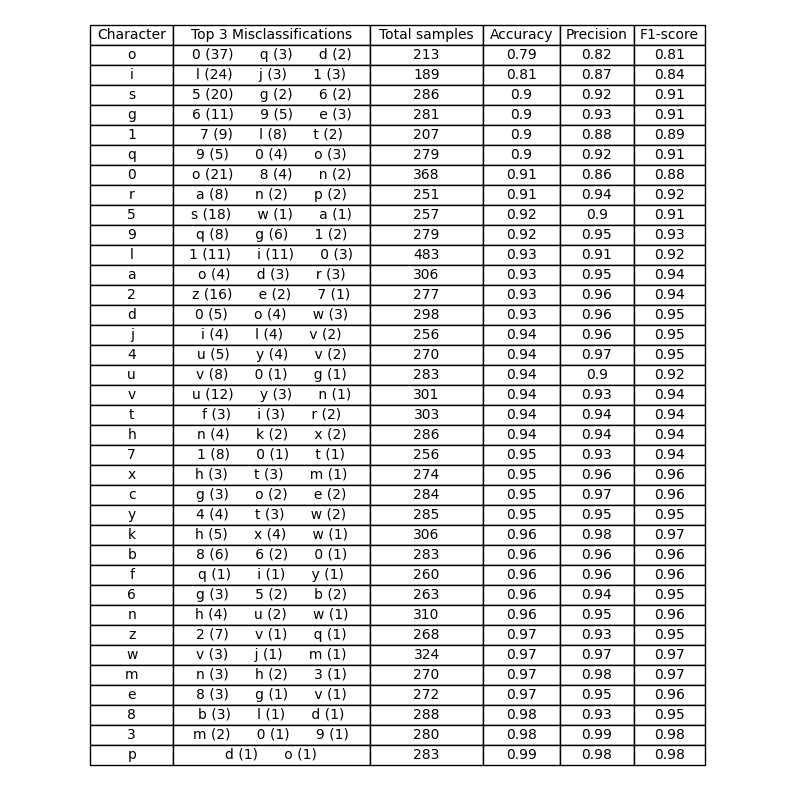

In [3]:
from helper_functions.evaluation import evaluate_character_performance, evaluate_captcha_performance, evaluate_individual_character_performance

evaluate_character_performance(cnn.model, X_test, y_test)
evaluate_captcha_performance(cnn.model, X_test_captcha, y_test_captcha, failed_segmentation_info)
evaluate_individual_character_performance(cnn.model, X_test, y_test)